**<center><h1>Introduction</h1></center>**
Clustering is the process of grouping objects with similar objects. For example, in the image below we have a collection of 2D coordinates that have been clustered into three categories - top left (yellow), bottom (red), and top right (blue).


<img src = "images/image23.png" />

A major difference between clustering and classification models is that clustering is an ‘unsupervised’ method, where ‘training’ is done without labels. Instead, models identify examples that have a similar collection of features. In the image above, examples that are in a similar location are grouped together.

Clustering is common and useful for exploring new data where patterns between data points, such as high-level categories, are not yet known. It's used in many fields that need to automatically label complex data, including analysis of social networks, brain connectivity, spam filtering, and so on.



**<center><h1>What is Clustering</h1></center>**

Clustering is a form of unsupervised machine learning in which observations are grouped into clusters based on similarities in their data values, or features. This kind of machine learning is considered unsupervised because it does not make use of previously known label values to train a model; in a clustering model, the label is the cluster to which the observation is assigned, based purely on its features.

For example, suppose a botanist observes a sample of flowers and records the number of petals and leaves on each flower.

<img src = "images/image24.png" />

It may be useful to group these flowers into clusters based on similarities between their features.

There are many ways this could be done. For example, if most flowers have the same number of leaves, they could be grouped into those with many vs few petals. Alternatively, if both petal and leaf counts vary considerably there may be a pattern to discover, such as those with many leaves also having many petals. The goal of the clustering algorithm is to find the optimal way to split the dataset into groups. What ‘optimal’ means depends on both the algorithm used and the dataset that is provided.

Although this flower example may be simple for a human to achieve with only a few samples, as the dataset grows to thousands of samples or to more than two features, clustering algorithms become very useful to quickly dissect a dataset into groups.

**<center><h1>Exercise - Train and evaluate a clustering model</h1></center>**

**<h2>Clustering - Introduction</h2>**

In contrast to supervised machine learning, unsupervised learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is clustering, which is simllar conceptually to classification, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or clusters, of entities that are close to one another while being separated from other clusters.

For example, let's take a look at a dataset that contains measurements of different species of wheat seed.

In [1]:
import pandas as pd

# load the training dataset
path="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv"
data = pd.read_csv(path)

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
111,19.38,16.72,0.8716,6.303,3.791,3.678
156,11.34,12.87,0.8596,5.053,2.849,3.347
168,11.35,13.12,0.8291,5.176,2.668,4.337
71,16.84,15.67,0.8623,5.998,3.484,4.675
120,20.24,16.91,0.8897,6.315,3.962,5.901
158,11.75,13.52,0.8082,5.444,2.678,4.378
101,17.99,15.86,0.8992,5.890,3.694,2.068
19,12.72,13.57,0.8686,5.226,3.049,4.102
118,18.89,16.23,0.9008,6.227,3.769,3.639
5,14.38,14.21,0.8951,5.386,3.312,2.462


As you can see, the dataset contains six data points (or features) for each instance (observation) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

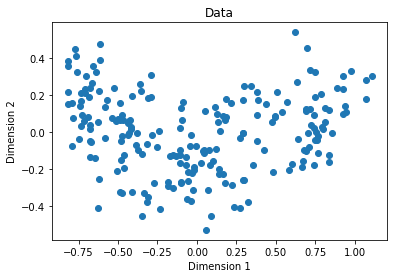

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

<hr></hr>

**<center><h1>Evaluate different types of clustering</h1></center>**

Training a clustering model
There are multiple algorithms you can use for clustering. One of the most commonly used algorithms is K-Means clustering that, in its simplest form, consists of the following steps:

1. The feature values are vectorized to define n-dimensional coordinates (where n is the number of features). In the flower example, we have two features (number of petals and number of leaves), so the feature vector has two coordinates that we can use to conceptually plot the data points in two-dimensional space.
2. You decide how many clusters you want to use to group the flowers, and call this value k. For example, to create three clusters, you would use a k value of 3. Then k points are plotted at random coordinates. These points will ultimately be the center points for each cluster, so they're referred to as centroids.
3. Each data point (in this case flower) is assigned to its nearest centroid.
4. Each centroid is moved to the center of the data points assigned to it based on the mean distance between the points.
5. After moving the centroid, the data points may now be closer to a different centroid, so the data points are reassigned to clusters based on the new closest centroid.
6. The centroid movement and cluster reallocation steps are repeated until the clusters become stable or a pre-determined maximum number of iterations is reached.

The following animation shows this process:

<img src = "images/k-means.gif" />

**<h2>Hierarchical Clustering</h2>**

Hierarchical clustering is another type of clustering algorithm in which clusters themselves belong to a larger group, which belong to even larger groups, and so on. The result is that data points can be clusters in differing degrees of precision: with a large number of very small and precise groups, or a small number of larger groups.

For example, if we apply clustering to the meanings of words, we may get a group containing adjectives specific to emotions (‘angry’, ‘happy’, and so on), which itself belongs to a group containing all human-related adjectives (‘happy’, ‘handsome’, ‘young’), and this belongs to an even higher group containing all adjectives (‘happy’, ‘green’, ‘handsome’, ‘hard’ etc.).


<img src = "images/4-hierarchical-clustering.png" />

Hierarchical clustering is useful for not only breaking data into groups, but understanding the relationships between these groups. A major advantage of hierarchical clustering is that it does not require the number of clusters to be defined in advance, and can sometimes provide more interpretable results than non-hierarchical approaches. The major drawback is that these approaches can take much longer to compute than simpler approaches and sometimes are not suitable for large datasets.

<hr></hr>

**<center><h1>Exercise - Train and evaluate advanced clustering models</h1></center>**

**<h2>Clustering - K-Means and Hierachial</h2>**

In the last notebook, we learned that data can be broken into clusters and learned how to see whether data may be compatible with such an analysis. In this notebook, we will perform this clustering automatically.

To get started, run the cell below to load our data



In [8]:
import pandas as pd

# load the training dataset
path = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv"
data = pd.read_csv(path)

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

**<h2>K-Means Clustering<h2>**

The algorithm we used to create our test clusters is K-Means. This is a commonly used clustering algorithm that separates a dataset into K clusters of equal variance. The number of clusters, K, is user defined. The basic algorithm has the following steps:

1. A set of K centroids are randomly chosen.
2. Clusters are formed by assigning the data points to their closest centroid.
3. The means of each cluster is computed and the centroid is moved to the mean.
4. Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligable movement of centroids and the clusters become static.
5. When the clusters stop changing, the algorithm has converged, defining the locations of the clusters - note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, reinitializing the centroids each time, and the model with the best WCSS is selected.

Let's try using K-Means on our seeds data with a K value of 3.

In [9]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

Let's see those cluster assignments with the two-dimensional data points.

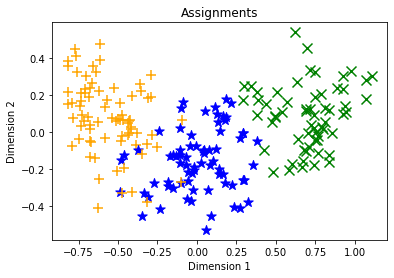

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

Hopefully, the the data has been separated into three distinct clusters.

So what's the practical use of clustering? In some cases, you may have data that you need to group into distict clusters without knowing how many clusters there are or what they indicate. For example a marketing organization might want to separate customers into distinct segments, and then investigate how those segments exhibit different purchasing behaviors.

Sometimes, clustering is used as an initial step towards creating a classification model. You start by identifying distinct groups of data points, and then assign class labels to those clusters. You can then use this labelled data to train a classification model.

In the case of the seeds data, the different species of seed are already known and encoded as 0 (Kama), 1 (Rosa), or 2 (Canadian), so we can use these identifiers to compare the species classifications to the clusters identified by our unsupervised algorithm

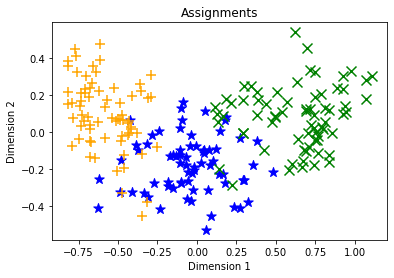

In [11]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)

There may be some differences between the cluster assignments and class labels, but the K-Means model should have done a reasonable job of clustering the observations so that seeds of the same species are generally in the same cluster.

**<h3>Hierarchical Clustering</h3>**

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by either a divisive method or agglomerative method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up** approach. In this lab you will work with agglomerative clustering which roughly works as follows:

1. The linkage distances between each of the data points is computed.
2. Points are clustered pairwise with their nearest neighbor.
3. Linkage distances between the clusters are computed.
4. Clusters are combined pairwise into larger clusters.
5. Steps 3 and 4 are repeated until all data points are in a single cluster.

The linkage function can be computed in a number of ways:

- Ward linkage measures the increase in variance for the clusters being linked,
- Average linkage uses the mean pairwise distance between the members of the two clusters,
- Complete or Maximal linkage uses the maximum distance between the members of the two clusters.

Several different distance metrics are used to compute linkage functions:

- Euclidian or l2 distance is the most widely used. This metric is only choice for the Ward linkage method.
- Manhattan or l1 distance is robust to outliers and has other interesting properties.
- Cosine similarity, is the dot product between the location vectors divided by the magnitudes of the vectors. Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.

**<h3>Agglomerative Clustering</h3>**

Let's see an example of clustering the seeds data using an agglomerative clustering algorithm.

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

So what do the agglomerative cluster assignments look like?

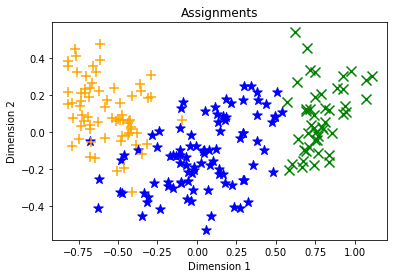

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)

<hr></hr>

**<center><h1>Summary</h1></center>**

In this module, you learned how clustering can be used to create unsupervised machine learning models that group data observations into clusters. You then used the scikit-learn framework in Python to train a clustering model.

While scikit-learn is a popular framework for writing code to train clustering models, you can also create machine learning solutions for clustering using the graphical tools in Microsoft Azure Machine Learning. You can learn more about no-code development of clustering models using Azure Machine Learning in the [Create a clustering model with Azure Machine Learning designer](https://docs.microsoft.com/en-us/learn/modules/create-clustering-model-azure-machine-learning-designer/) module.

**<h2>Challenge: Cluster Unlabelled Data</h2>**

Now that you've seen how to create a clustering model, why not try for yourself? You'll find a clustering challenge in the [04 - Clustering Challenge.ipynb](https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/04%20-%20Clustering%20Challenge.ipynb) notebook!